In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# 1) load data:
gm = pd.read_csv("gm.bz2", sep="\t")

# loaded gm data

In [36]:
# 2) a breif check :
print(gm.shape)
print(gm.head())


#There are 13055 rows and 25 columns.
#The first few line look pretty reasonable


(13055, 25)
  iso3   name iso2    region                       sub-region  \
0  ABW  Aruba   AW  Americas  Latin America and the Caribbean   
1  ABW  Aruba   AW  Americas  Latin America and the Caribbean   
2  ABW  Aruba   AW  Americas  Latin America and the Caribbean   
3  ABW  Aruba   AW  Americas  Latin America and the Caribbean   
4  ABW  Aruba   AW  Americas  Latin America and the Caribbean   

  intermediate-region    time  totalPopulation  fertilityRate  lifeExpectancy  \
0           Caribbean  1960.0          54211.0          4.820          65.662   
1           Caribbean  1961.0          55438.0          4.655          66.074   
2           Caribbean  1962.0          56225.0          4.471          66.444   
3           Caribbean  1963.0          56695.0          4.271          66.787   
4           Caribbean  1964.0          57032.0          4.059          67.113   

   ...  accessElectricity  agriculturalLand  agricultureTractors  \
0  ...                NaN               Na

In [4]:
# 3):
len(gm.name.unique())

# There are 250 different countries in the data 

250

In [5]:
# 4) year check :
earliest_year = gm.time.max()
most_recent_year =gm.time.min()

print(earliest_year)
print(most_recent_year)

# The earlist year is 1960 and the most recent year is 2019

2019.0
1960.0


In [6]:
# 5) misisng value check :
gm.isna().sum()

# Almost all variables has missing values, youthFemaleLiteracy and 
# youthMaleLiteracy has the most missing value, 12134. But iso3 has 
# no missing values at all

iso3                       0
name                     240
iso2                     300
region                   241
sub-region               241
intermediate-region     7697
time                      36
totalPopulation           76
fertilityRate           1307
lifeExpectancy          1325
childMortality          2600
youthFemaleLiteracy    12134
youthMaleLiteracy      12134
adultLiteracy          12118
GDP_PC                  3585
accessElectricity       7608
agriculturalLand        1910
agricultureTractors     6947
cerealProduction        3606
fertilizerHa            4929
co2                     2658
greenhouseGases         4994
co2_PC                  2661
pm2.5_35               10727
battleDeaths           12051
dtype: int64

In [7]:
# 6) sample out rows in the data where year element is missing :
temp = gm[['name', 'iso2', 'totalPopulation','time']]
temp = temp[temp.time.isna() == True]
temp.sample(10)



,name,iso2,totalPopulation,time
12212,United States Minor Outlying Islands,UM,NaN,NaN
4815,French Guiana,GF,NaN,NaN
8543,Norfolk Island,NF,NaN,NaN
4996,Heard Island and McDonald Islands,HM,NaN,NaN
8664,Niue,NU,NaN,NaN
8362,Mayotte,YT,NaN,NaN
10348,Svalbard and Jan Mayen,SJ,NaN,NaN
10346,South Georgia and the South Sandwich Islands,GS,NaN,NaN
542,Antarctica,AQ,NaN,NaN
11610,Tokelau,TK,NaN,NaN



I think the reason why the year is missing is that these countries were too
small or caught between geopolitical conflicts or not recoganized as country at
the time of the data record. 

In [8]:
# 7) Interesting data:
gm.name.str.contains('taiwan').sum()

# there is no record of taiwan at all
# I think this is caused by Chinese government's pressure on international 
# recognition of Taiwan as a country

0

In [9]:
# 8): 
name_missing = gm.name.isna().sum()
iso2_missing = gm.iso2.isna().sum()

no_name = gm[(gm.name.isna() == True) & (gm.iso2.isna() == False)]
no_iso2 = gm[(gm.name.isna() == False) & (gm.iso2.isna() == True)]

print(name_missing)
print(iso2_missing)
print(no_name.shape)
print(no_iso2.shape)
print(no_iso2.sample())

"""
There are 240 cases of name missing and 300 cases of iso2 missing

There are 0 cases of name missing but iso2 is not and there are 60 cases
of iso2 missing but name is not 
"""


240
300
(0, 25)
(60, 25)
     iso3     name iso2  region          sub-region intermediate-region  \
8384  NAM  Namibia  NaN  Africa  Sub-Saharan Africa     Southern Africa   

        time  totalPopulation  fertilityRate  lifeExpectancy  ...  \
8384  1981.0        1080941.0           6.31           57.69  ...   

      accessElectricity  agriculturalLand  agricultureTractors  \
8384                NaN          386570.0                  NaN   

      cerealProduction  fertilizerHa  co2  greenhouseGases  co2_PC  pm2.5_35  \
8384           75400.0           NaN  NaN        6431.6512     NaN       NaN   

      battleDeaths  
8384           NaN  

[1 rows x 25 columns]


'\nThere are 240 cases of name missing and 300 cases of iso2 missing\n\nThere are 0 cases of name missing but iso2 is not and there are 60 cases\nof iso2 missing but name is not \n'

In [10]:
# 9)"
gm[gm.name == 'Namibia'].iso2.count()

# I can not find the iso2 for Namibia
# Namibia's iso2 is NA, maybe the data recorder written it down as NA
# but the computer recoginized it as a misisng value :(

0

### 1.2 Analyze Wealth

In [11]:
# 1):
temp = gm[gm.GDP_PC.isna() == False]
temp.time.max()

# the most recent GDP data is 

2019.0

In [12]:
# 2):
gm.GDP_PC.mean()

# the average GDP on this planet is $12048

12048.778024852181

In [13]:
# 3):
temp = gm[gm.time == 2019]
richest_c = temp.loc[temp.GDP_PC.nlargest(3).index]
poorest_c = temp.loc[temp.GDP_PC.nsmallest(3).index]

print("TOP 3 richest countries: ")
print(richest_c[['name', 'totalPopulation', 'GDP_PC']])
print()
print("TOP 3 poorest countries: ")
print(poorest_c[['name', 'totalPopulation', 'GDP_PC']])

# Most richest countries are European Countries with very small population
# most poorest countries are African countries with relative large population
# the wealth gap between rich and poor countries are staggering

TOP 3 richest countries: 
            name  totalPopulation        GDP_PC
7039  Luxembourg         620001.0  111043.53170
1505     Bermuda          64027.0   94106.36125
8844      Norway        5347896.0   92556.32164

TOP 3 poorest countries: 
                                   name  totalPopulation     GDP_PC
843                             Burundi       11530580.0  208.07473
1926           Central African Republic        4745185.0  384.14556
2407  Congo, Democratic Republic of the       86790567.0  423.64026


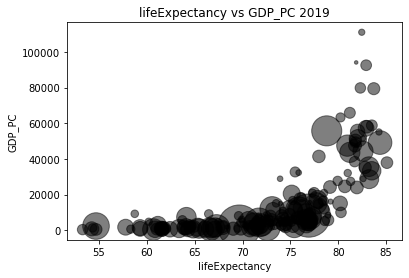

In [14]:
# 4):
s_1 = np.sqrt(temp.totalPopulation) / 20
_ = plt.scatter(temp.lifeExpectancy, temp.GDP_PC, alpha=0.5,
               s=s_1, color='black')
_ = plt.xlabel("lifeExpectancy")
_ = plt.ylabel("GDP_PC")
_ = plt.title("lifeExpectancy vs GDP_PC 2019")

# Life Expectancy increases as countries' GDP increases, better wealth means
# more stable government and better living conditions, so people choose
# to live a better life 

In [15]:
# 5):
temp.groupby('region')['GDP_PC'].mean().sort_values(ascending=False)

# Of course Europe will have the most average GPD_PC, this looks like 
# a reasonable order for me. Europe has the most developed countries 
# followed by America then Asia and Africa being the last


region
Europe      33227.983767
Americas    14516.826303
Asia        14116.124163
Oceania     11817.735554
Africa       2765.708956
Name: GDP_PC, dtype: float64

### 2 Explore Distributions

In [16]:
# 1):
S = 10000
S

# i set the sample size S as 10000

10000

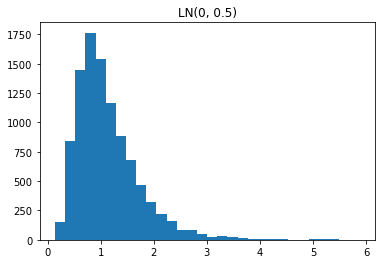

In [17]:
# 2):
LN1 = np.random.lognormal(0, 0.5, size = S)
LN2 = np.random.lognormal(0, 1.68, size = S)

_ = plt.hist(LN1, bins=30)
_ = plt.title("LN(0, 0.5)")

# the linear linear plot is very skewed right
# the log linear plot is comparebly less skewed than the 
# linear linear plot and looks more normal

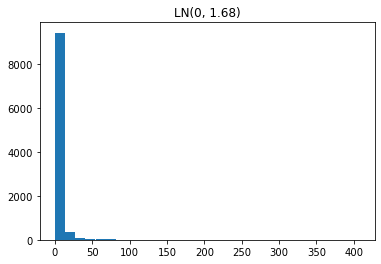

In [18]:
_ = plt.hist(LN2, bins=30)
_ = plt.title("LN(0, 1.68)")

3):

Look at the histograms, LN(0,1.68) describes the most unequal distribution
LN(0,0.5) describes the least unequal distribution

In [19]:
# 4):
LN1_mean = LN1.mean()
LN1_var = LN1.var()

LN2_mean = LN2.mean()
LN2_var = LN2.var()

print(LN1_mean, LN2_mean)
print(LN1_var,LN2_var)

# I tried multiple times and the mean and variance for LN1 are relative the same
# through out different trials. The mean for LN2 is also stable, BUT the variance
# of LN2 varies drastically due to more inequality



1.129928989772844 3.9031583213970458
0.3616980668720838 168.68287276989088


### 2.2 How is Data Distributed

In [20]:
# 1):
re78 = pd.read_csv("re78.bz2", sep = "\t")
re78.shape

# data looks reasonable

(2675, 10)

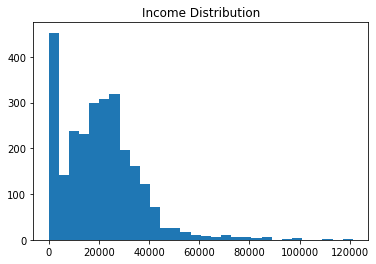

In [21]:
# 2):

income = re78.re78
income_log = np.log(1 + re78.re78)

_ = plt.hist(income, bins=30)
_ = plt.title("Income Distribution")

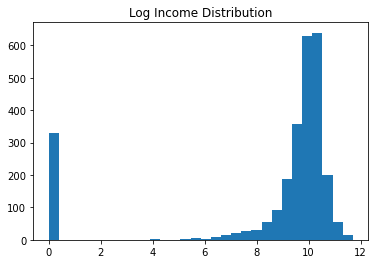

In [22]:
_ = plt.hist(income_log, bins=30)
_ = plt.title("Log Income Distribution")

# log income histogram looks like it has less inequality

In [23]:
# 3):
income_mean = income.mean()
income_sd = income.std()

income_log_mean = income_log.mean()
income_log_sd = income_log.std()

print(income_mean, income_log_mean)
print(income_sd, income_log_sd)

# The standard deviations are pretty small compare to the mean for both income and 
# log income

20502.37607865417 8.604875840853799
15632.519774212507 3.3251912556938423


In [24]:
# 4):
temp = re78[re78.re78 > 0]
top20 = temp.re78.nlargest(467)
button20 = temp.re78.nsmallest(470)

QSR = top20.sum()/ button20.sum()
QSR


# I calculated QSR and get around 6.6

6.62004668303448

### 3 Explore Central Limit Theorem

In [25]:
# 1):

np.random.randint(0,2,size=10)*2 -1 

EX = -1 * 0.5  + 1 * 0.5

VarX = (0.5 * 1 + 0.5 * 1) - EX**2

print(EX, VarX)

# the expected value is 0 and the variance is 1

0.0 1.0


In [26]:
# 2):

R = 100000
R

# set the repetition to 100000 to make histogram smoother

100000

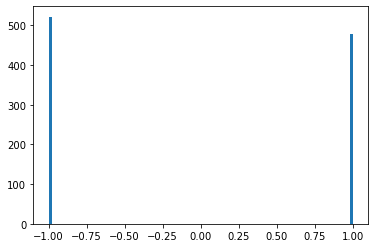

In [27]:
# 3):
np.random.seed(1)
X = np.random.randint(0,2,size=(1000,1))*2 -1

_ = plt.hist(X, bins=100)

# the distribution looks relative equal, there are  a bit more tails


In [28]:
# 4):
X_mean = X.mean()
X_var = X.var()

print(X_mean, X_var)

# the sample mean and sample variance are very close to the theoretical mean and variances

-0.044 0.9980639999999998


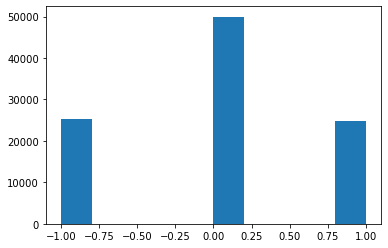

In [29]:
# 5):
np.random.seed(1)
X_2 = np.random.randint(0,2,size=(R,2))*2 -1

X_2_mean = X_2.mean(axis = 1)

_ = plt.hist(X_2_mean, bins=10)

# there are most mean that are the expected value

In [30]:
# 6):

X_2_mean_mean = X_2_mean.mean()
X_2_mean_var = X_2_mean.var()

print(X_2_mean_mean, X_2_mean_var)

# the mean of R pairs mean is close to the epected value, the variance is about .5

-0.00286 0.5004918204


In [31]:
# 7):

print(X_2_mean_mean, X_2_mean_var)
print(X_mean, X_var)

# just like the CLT, the variance of a pair mean is about 1/2 of X's mean
# and the pair mean is a bit closer to the expected value than X's mean



-0.00286 0.5004918204
-0.044 0.9980639999999998


0.001264 0.999998402304


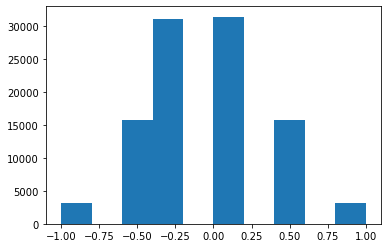

In [32]:
# 8):
np.random.seed(1)
X_5 = np.random.randint(0,2,size=(R,5))*2 -1
X_5_mean = X_5.mean()
X_5_var = X_5.var()

X_5_mean_mean = X_5.mean(axis = 1)


_ = plt.hist(X_5_mean_mean, bins=10)

print(X_5_mean, X_5_var)

# the sample mean and variance of 5 tuple are even closer to the theoretical
# values than when S = 1. The histogram also look a bit different as it become
# more normally disbributed



-0.0002836 0.999999919571041


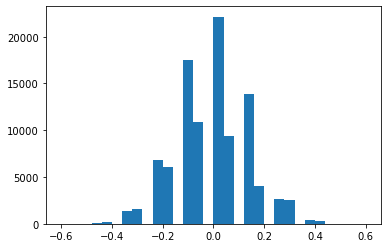

In [33]:
# 9):
np.random.seed(1)
X_50 = np.random.randint(0,2,size=(R,50))*2 -1
X_50_mean = X_50.mean()
X_50_var = X_50.var()

X_50_mean_mean = X_50.mean(axis = 1)
_ = plt.hist(X_50_mean_mean, bins=30)

print(X_50_mean, X_50_var)

# as the number of S goes up, the closer it gets for sample mean and variances to
# theorectical values and the histogram look more normally distributed

10):

The shape of histogram changes as number of tuples goes up, the more tuple, 
the more similar of the two bars since the difference become less noticeable


11):

Because as number of tuple grows, the mean become more precise and the disbribution
become more normal , therefore it become the 山 shape.

### Time Spent

I spent about 3 and half hours for this problem set